### Support Vector Machines

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

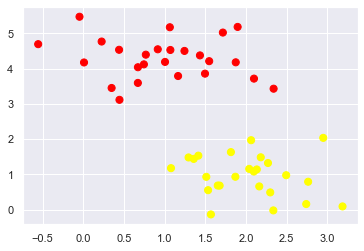

In [4]:
# Simulate fake data clusters
X, y = make_blobs(n_samples=50, centers=2,
random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

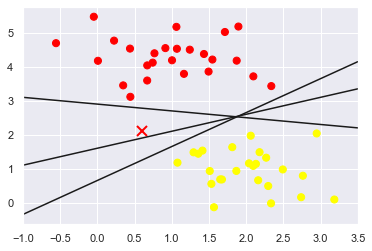

In [5]:
# Possible SVM lines
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    plt.xlim(-1, 3.5);


#### Maximizing the Margin

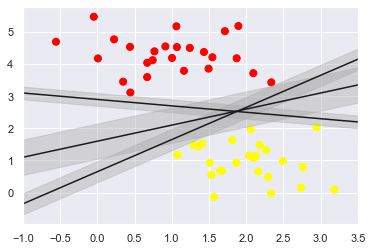

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',
        alpha=0.4)
plt.xlim(-1, 3.5);

In [38]:
# Fitting a SVM
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [39]:
model.support_vectors_

array([[ 0.71949558,  0.62386998],
       [ 0.86224472, -0.5791683 ],
       [-0.58864132, -0.88059112],
       [-0.03112541,  1.00356812],
       [-1.01150691, -0.17442393],
       [-1.09684545, -0.19503474],
       [-0.07661031, -0.84769891],
       [ 0.97783538,  0.25346394],
       [-0.39366845,  0.9629959 ],
       [ 0.56141663, -0.80213685],
       [-1.03000965, -0.38111877],
       [-0.96106331,  0.43093605],
       [-0.5784842 ,  0.87664692],
       [ 0.9406295 ,  0.33750663],
       [ 0.18577851,  1.23738919],
       [ 0.8443367 ,  0.44479567],
       [ 0.67283007, -0.81686519],
       [-0.54873886,  0.83480496],
       [ 1.0994737 , -0.23655267],
       [-1.07171793, -0.46961281],
       [ 0.25673835, -1.02286419],
       [ 0.13600372,  1.05331413],
       [-0.30719987, -0.95048443],
       [-1.08834188,  0.14034834],
       [ 0.5947959 , -0.84240898],
       [ 0.8702496 , -0.27031424],
       [-0.16987135, -0.95738888],
       [-1.04077641,  0.08602671],
       [ 0.68512557,

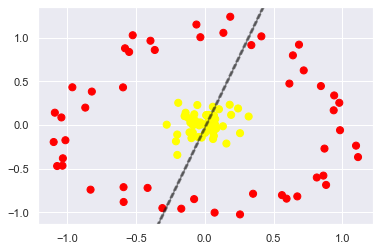

In [40]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
                levels=[-1,0,1], alpha=0.5,
                linestyles=['--','-','--'])
    
    # plot SV
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

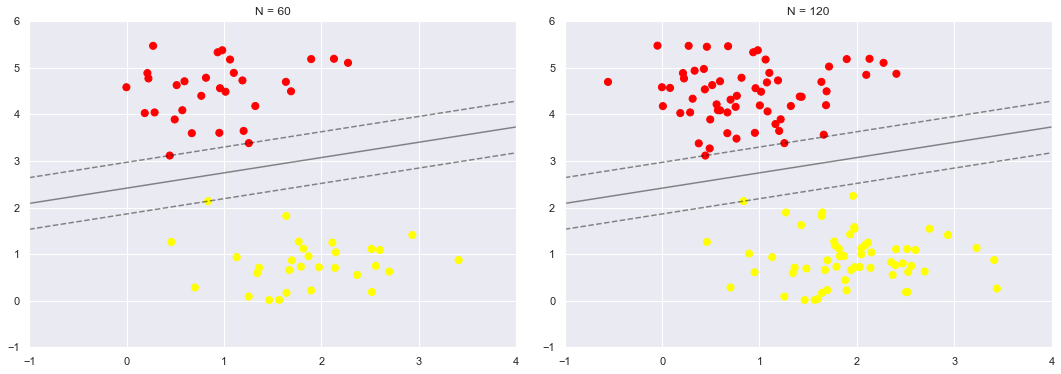

In [41]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                        random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
     
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


#### Kernel SVM

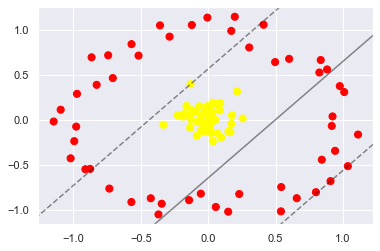

In [42]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);


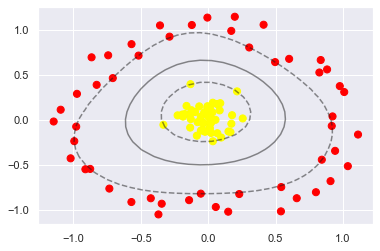

In [43]:
# Change kernel from linear to radial basis function
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
    s=300, lw=1, facecolors='none');


#### Softening Margins

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=1.2)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='autumn');